# Student Performace EDA

# Life cycle of Machine Learning Project

1. Understanding the problem statement
2. Data Collection
3. Data Analysis
4. Data EDA
5. Data preprocessing
6. Model Training
7. Choose the best model

# 1. Understanding the problem statement
. This project is about how student's performance is affected by other states variables such as Gender, Ethinicity, Parental level of education, Test preparation course.

# Data Collection
This data is collected from the Kaggle source.
This data sets contains 8 column and more than 1000 rows.

# Importing required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing dataset

In [4]:
data = pd.read_csv('D:\\Projects\\ML_Projects\\notebook\\data\StudentsPerformance.csv')

# Use .head to show the top 5 records from the given dataset

In [5]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# .shape provides the number of rows and columns

In [6]:
data.shape

(1000, 8)

In [7]:
# In the above datasets, there are exactly 1000 rows and 8 columns

# On analysing the above dataset, we found folllwing information

.gender -> is the sex of students, which is either male or female
.race/ethinicity -> defines ethinicity of students, which fall in (Group A,B,C,D,E)
.parental level of education -> defines parents education
.lunch -> defines having lunch before test
.test preparation course -> defines whether the student complete or not complete course before test
.math score -> defines number of score occured in math subject
.reading score -> defines number of score scored in reading capabilities
.writing score

# Some operation to perform are:
1. Check missing values
2. Check duplicates
3. Check data types
4. Check the number of unique values in each column
5. Check the statistics of dataset
6. Check various categories of data present in dataset

# Check missing values

In [8]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

There are no missing values in the dataset

# Check duplicates

In [10]:
data.duplicated().sum()

0

This means, there are no duplicates values in dataset

# Check data types

In [12]:
data.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

There are 5 columns of object data types and 3 columns of numerical data types

# Check the number of unique values in each column

In [14]:
data.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

# Check the statistics of dataset 

In [15]:
data.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


.describe() provides the related statistics of given dataset

# Obtained information:
1. All means are very close to each other (66 to 69)
2. All standard deviation are close to each other (14.6 to 15.19)
3. Minimum and Maximum score obtained in math is 0 and 100 respectively.
4. Similarly, for reading_score is 59 and 100 respectively.
5. And, for writing_score is 69 and 100 respectively.

# Performing EDA

In [16]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Counting the number of male and female students

In [17]:
data['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

There are 518 female and 482 male students

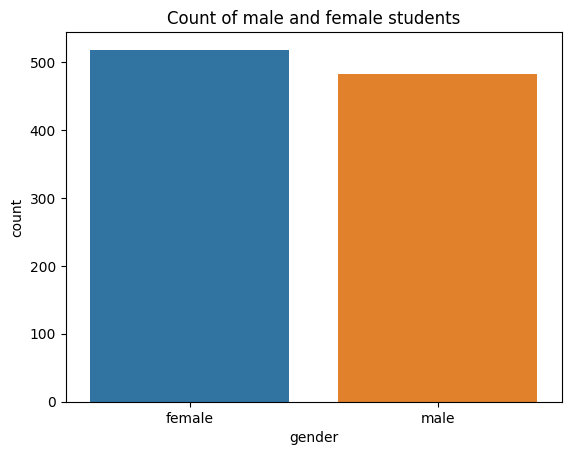

In [19]:
sns.countplot(data=data,x='gender')
plt.title("Count of male and female students")
plt.show()

In [21]:
data['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

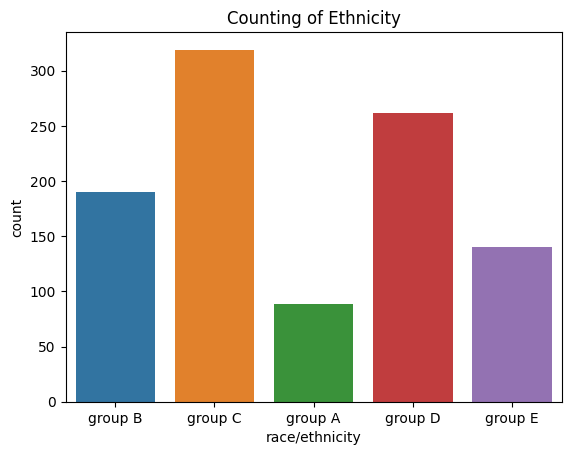

In [22]:
sns.countplot(data=data,x='race/ethnicity')
plt.title('Counting of Ethnicity')
plt.show()

# Adding new column names 'Total score' and 'Average'

In [23]:
data['total_score']= data['math score']+data['reading score']+data['writing score']

data['average_score']= data['total_score']/3

In [24]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


# Obtaining more insights

In [26]:
math_full_marks = data[data['math score']==100]['average_score'].count()
reading_full_marks = data[data['reading score']==100]['average_score'].count()
writing_full_marks = data[data['writing score']==100]['average_score'].count()

print("Number of students who obtained full marks in Maths:",math_full_marks)
print("Number of students who obtained full marks in Reading:",reading_full_marks)
print("Number of student who obtained full marks in writing:",writing_full_marks)

Number of students who obtained full marks in Maths: 7
Number of students who obtained full marks in Reading: 17
Number of student who obtained full marks in writing: 14


In [27]:
math_less_20 = data[data['math score']<=20]['average_score'].count()
reading_less_20 = data[data['reading score']<=20]['average_score'].count()
writing_less_20 = data[data['writing score']<=20]['average_score'].count()

print("Number of students who obtained less than 20 marks in Maths:",math_less_20)
print("Number of studetns who obtained less than 20 marks in Reading:", reading_less_20)
print('Number of students who obtaines less than 20 marks in Writing:',writing_less_20)

Number of students who obtained less than 20 marks in Maths: 4
Number of studetns who obtained less than 20 marks in Reading: 1
Number of students who obtaines less than 20 marks in Writing: 3


# Histogram and KDE

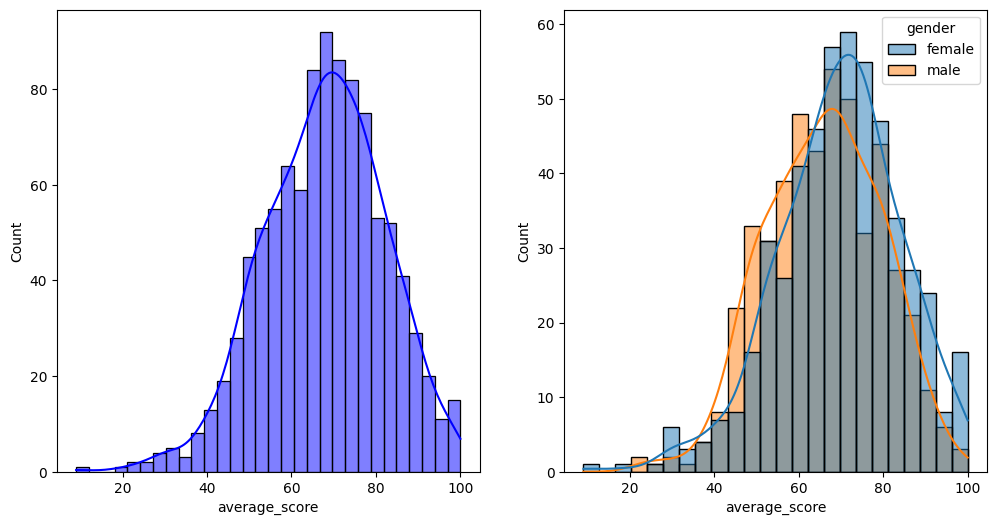

In [29]:
fig, axs = plt.subplots(1,2, figsize=(12,6))
plt.subplot(121)
sns.histplot(data=data,x='average_score',bins=30,kde=True,color='b')
plt.subplot(122)
sns.histplot(data=data,x='average_score',kde=True,hue='gender')
plt.show()

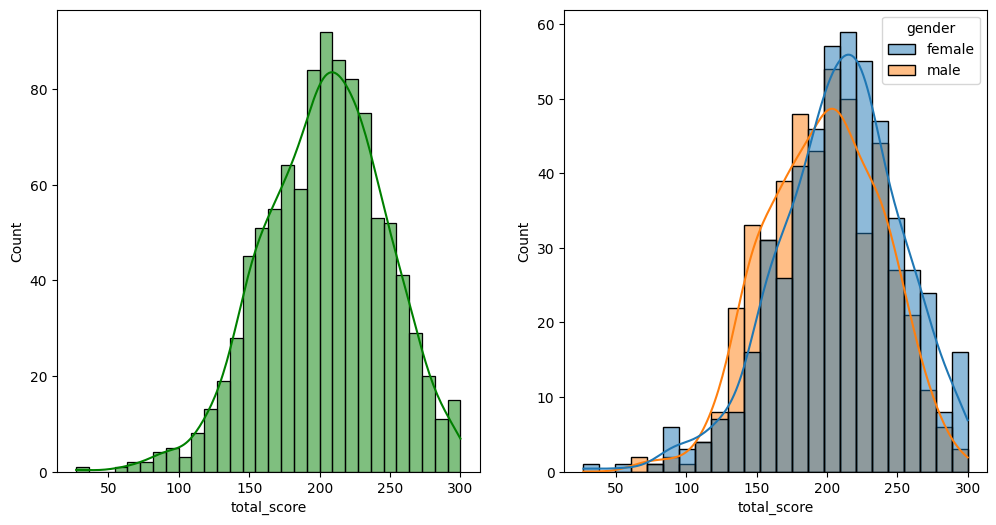

In [33]:
fig,axs= plt.subplots(1,2,figsize=(12,6))
plt.subplot(121)
sns.histplot(data=data,x='total_score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=data,x='total_score',kde=True,hue='gender')
plt.show()

From the above histgram, it is concluded that female students performs well in all manners

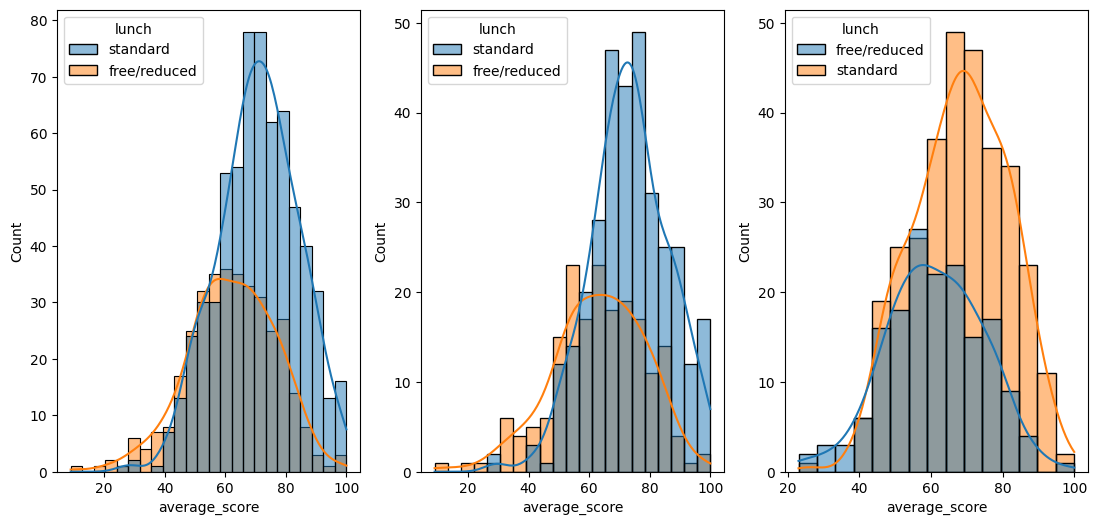

In [38]:
plt.subplots(1,3,figsize=(18,6))
plt.subplot(141)
sns.histplot(data=data,x='average_score',kde=True,hue='lunch')
plt.subplot(142)
sns.histplot(data=data[data.gender=='female'],x='average_score',kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=data[data.gender=='male'],x='average_score',kde='True',hue='lunch')
plt.show()

From the histogram, it is concluded that standard lunch helps to score good marks in all respect

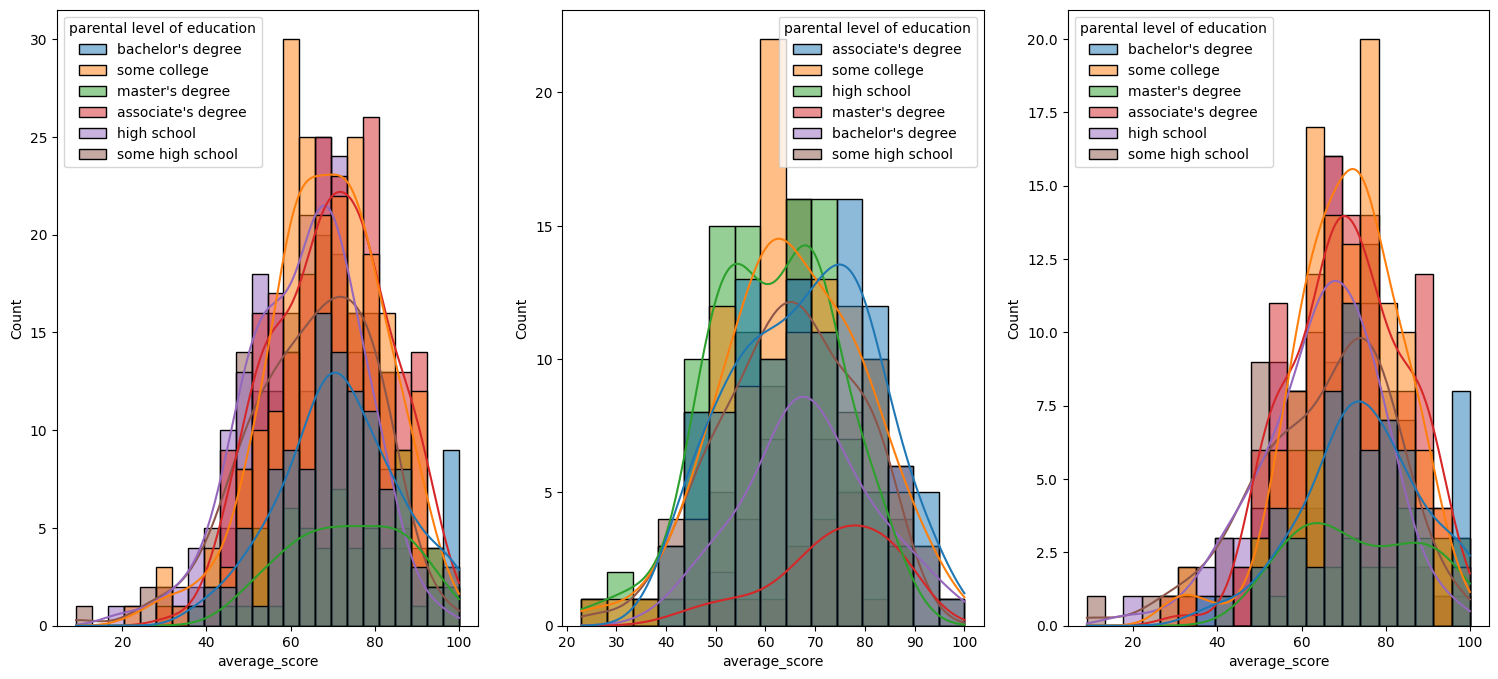

In [43]:
plt.subplots(1,3,figsize=(25,8))
plt.subplot(141)
ax= sns.histplot(data=data,x='average_score',kde=True,hue='parental level of education')
plt.subplot(142)
ax = sns.histplot(data=data[data.gender=='male'],x='average_score',kde='Tru',hue='parental level of education')
plt.subplot(143)
ax= sns.histplot(data=data[data.gender=='female'],x='average_score',kde=True,hue='parental level of education')
plt.show()

# Obtaining maximum score obtained by students in all subjects

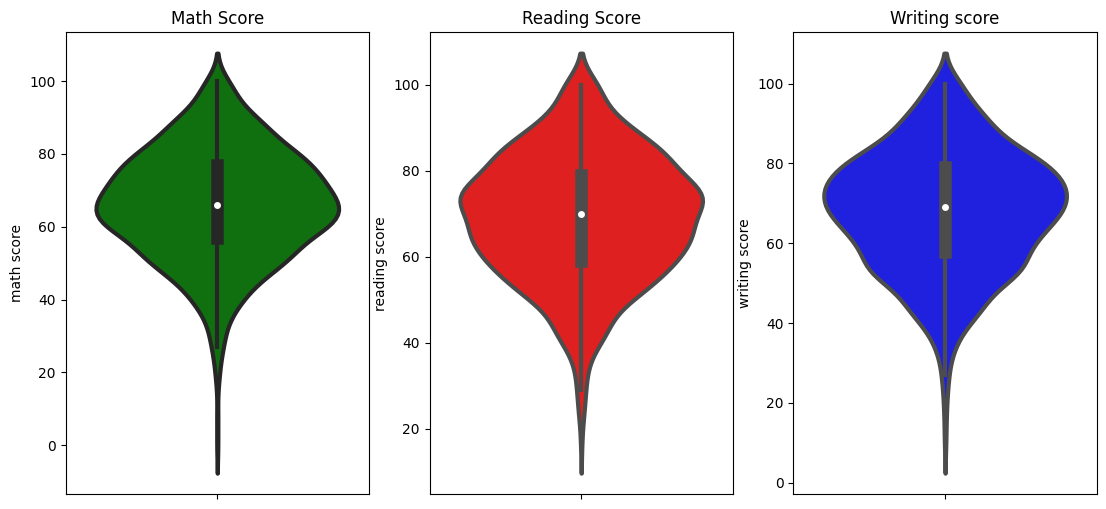

In [44]:
plt.figure(figsize=(18,6))
plt.subplot(1,4,1)
plt.title("Math Score")
sns.violinplot(data=data,y='math score',color='g',linewidth=3)
plt.subplot(1,4,2)
plt.title("Reading Score")
sns.violinplot(data=data,y='reading score',color='r',linewidth=3)
plt.subplot(1,4,3)
plt.title("Writing score")
sns.violinplot(data=data,y='writing score',color='b',linewidth=3)
plt.show()

# Insights
1. From the above three violinplot, it is concluded that most of the students scored the marks between 60-80 in maths.
2. And, most of the students scored the marks 50-90 in reading.
3. similarly, most of the students scored the marks between 50-80 in writing. 

# BIVARIATE ANALYSIS

In [45]:
gender_group = data.groupby('gender').mean()
gender_group

,math score,reading score,writing score,total_score,average_score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837483


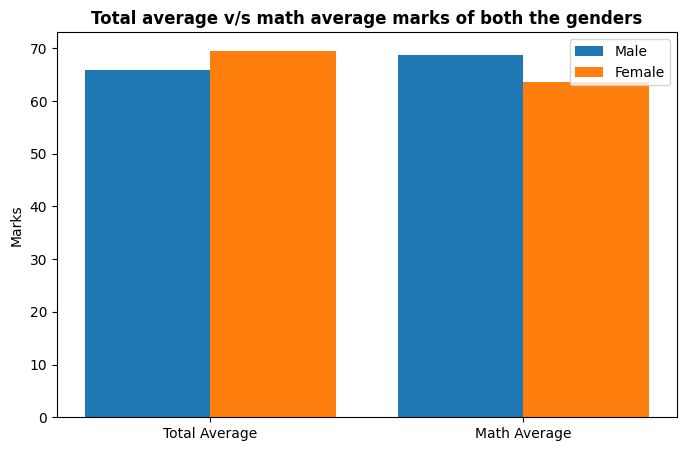

In [52]:
plt.figure(figsize=(8,5))
X= ['Total Average','Math Average']

female_scores = [gender_group['average_score'][0],gender_group['math score'][0]]
male_scores = [gender_group['average_score'][1],gender_group['math score'][1]]

X_axis = np.arange(len(X))
plt.bar(X_axis-0.2,male_scores,0.4,label='Male')
plt.bar(X_axis+0.2,female_scores,0.4,label='Female')

plt.xticks(X_axis,X)
plt.ylabel("Marks")
plt.title("Total average v/s math average marks of both the genders",fontweight='bold')
plt.legend()
plt.show()


# Insights
1. Overall in average, female scored good marks than the male students.
2. But, in math male scores good marks than the female students.

# Parental education information

In [55]:
data['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

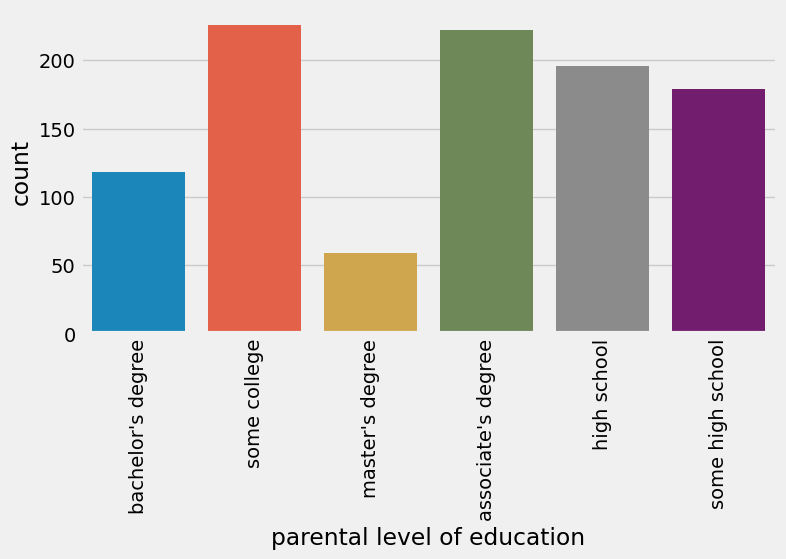

In [65]:
plt.figure(figsize=(8,4))
sns.countplot(data=data,x='parental level of education')
plt.xticks(rotation=90)
plt.show()

From the above countplot, it is found that maximum number of parents are from some college education background

# Extracting information from lunch of students that they served

In [66]:
data['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

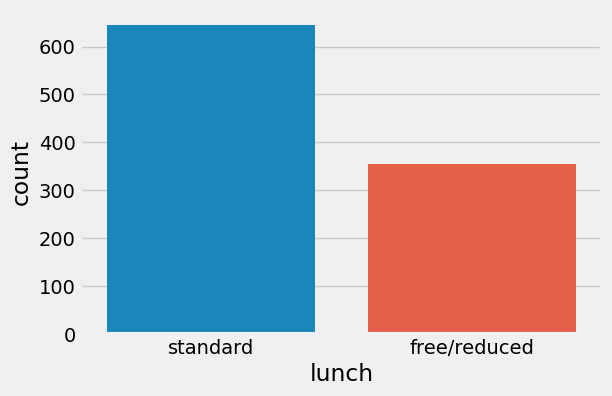

In [68]:
plt.figure(figsize=(6,4))
sns.countplot(data=data,x='lunch')
plt.show()

From above, it is concluded that most of the students preferred standard lunch type.

# Bivariate Analysis(Is test preparation course has any impact on student's performance)

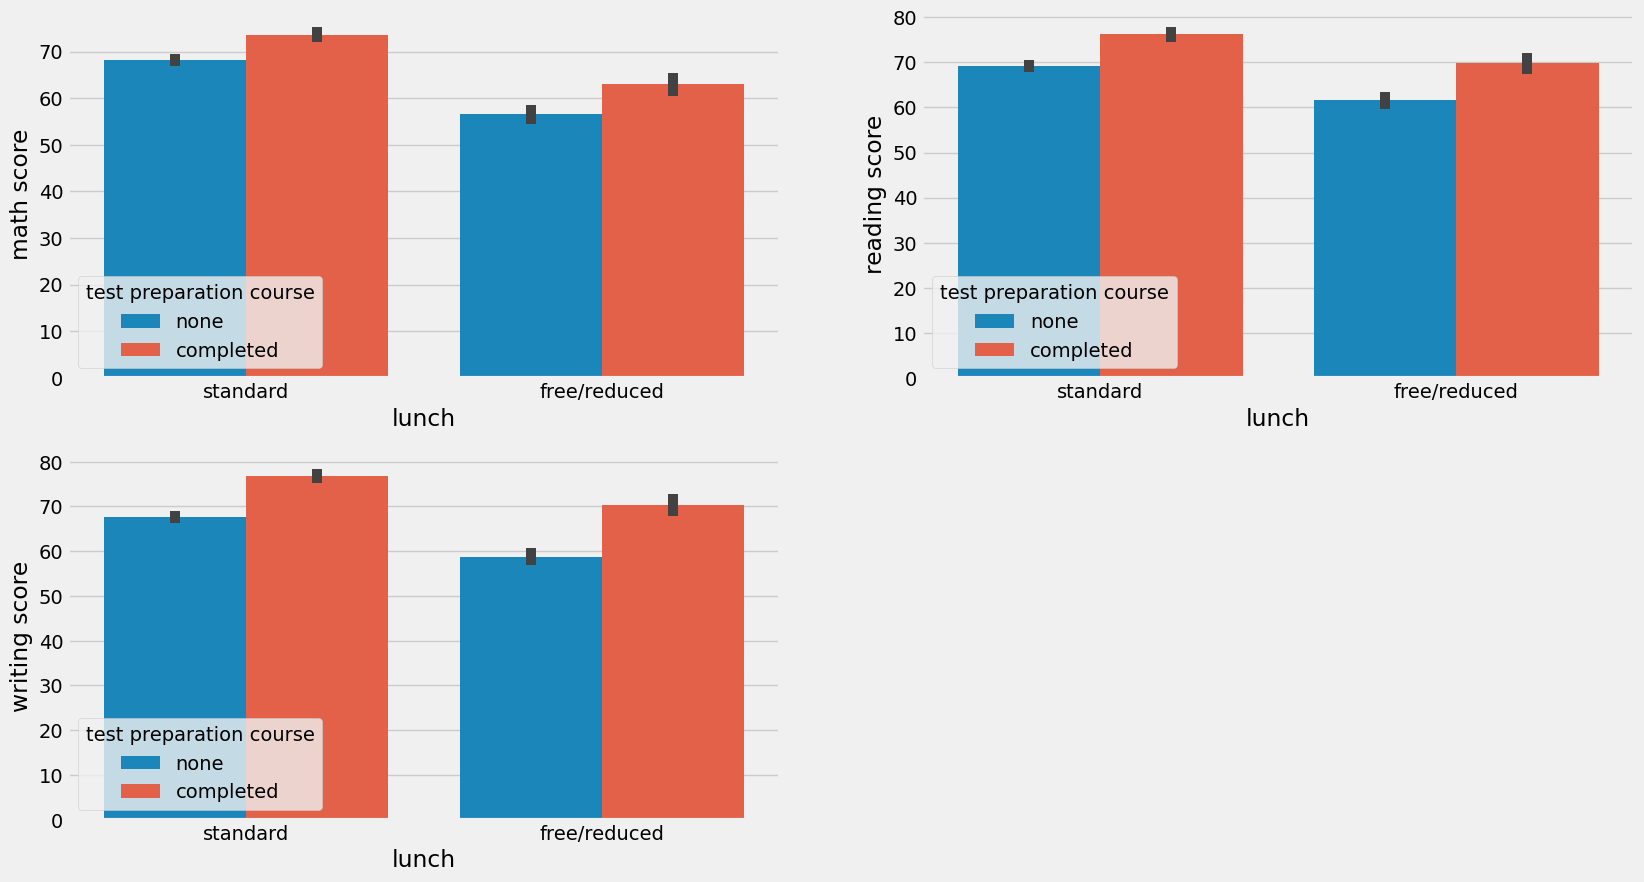

In [71]:
plt.figure(figsize=(18,10))
plt.subplot(2,2,1)
sns.barplot(x=data['lunch'],y=data['math score'],hue=data['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=data['lunch'],y=data['reading score'],hue=data['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=data['lunch'],y=data['writing score'],hue=data['test preparation course'])
plt.show()

In overall, those students who completed the test preparation course has scored the good marks in all three subjects than other.

# Checking Outliers

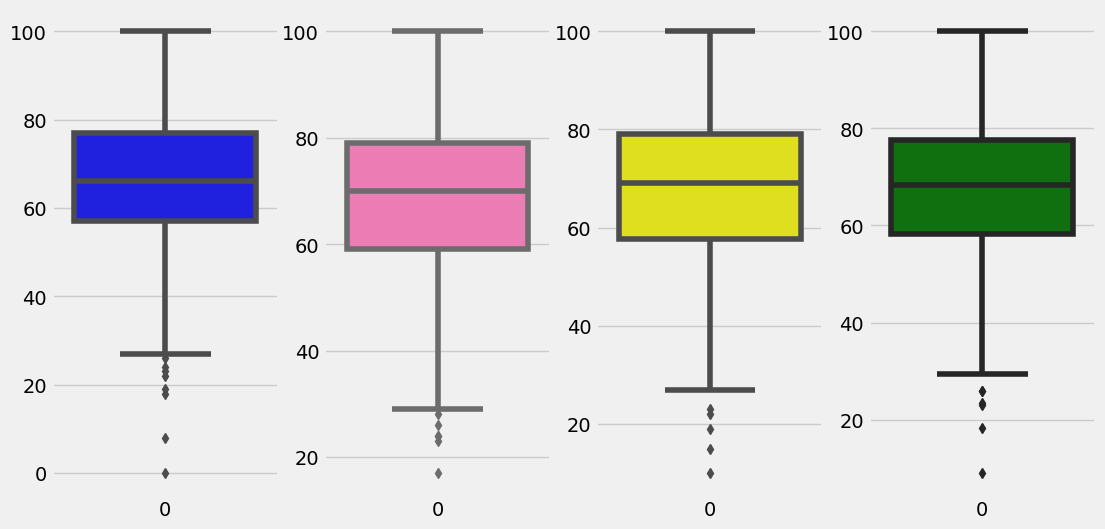

In [72]:
plt.subplots(1,4,figsize=(12,6))
plt.subplot(141)
sns.boxplot(data['math score'],color='blue')
plt.subplot(142)
sns.boxplot(data['reading score'],color='hotpink')
plt.subplot(143)
sns.boxplot(data['writing score'],color='yellow')
plt.subplot(144)
sns.boxplot(data['average_score'],color='green')
plt.show()

# Multivariate analysis using pairplot

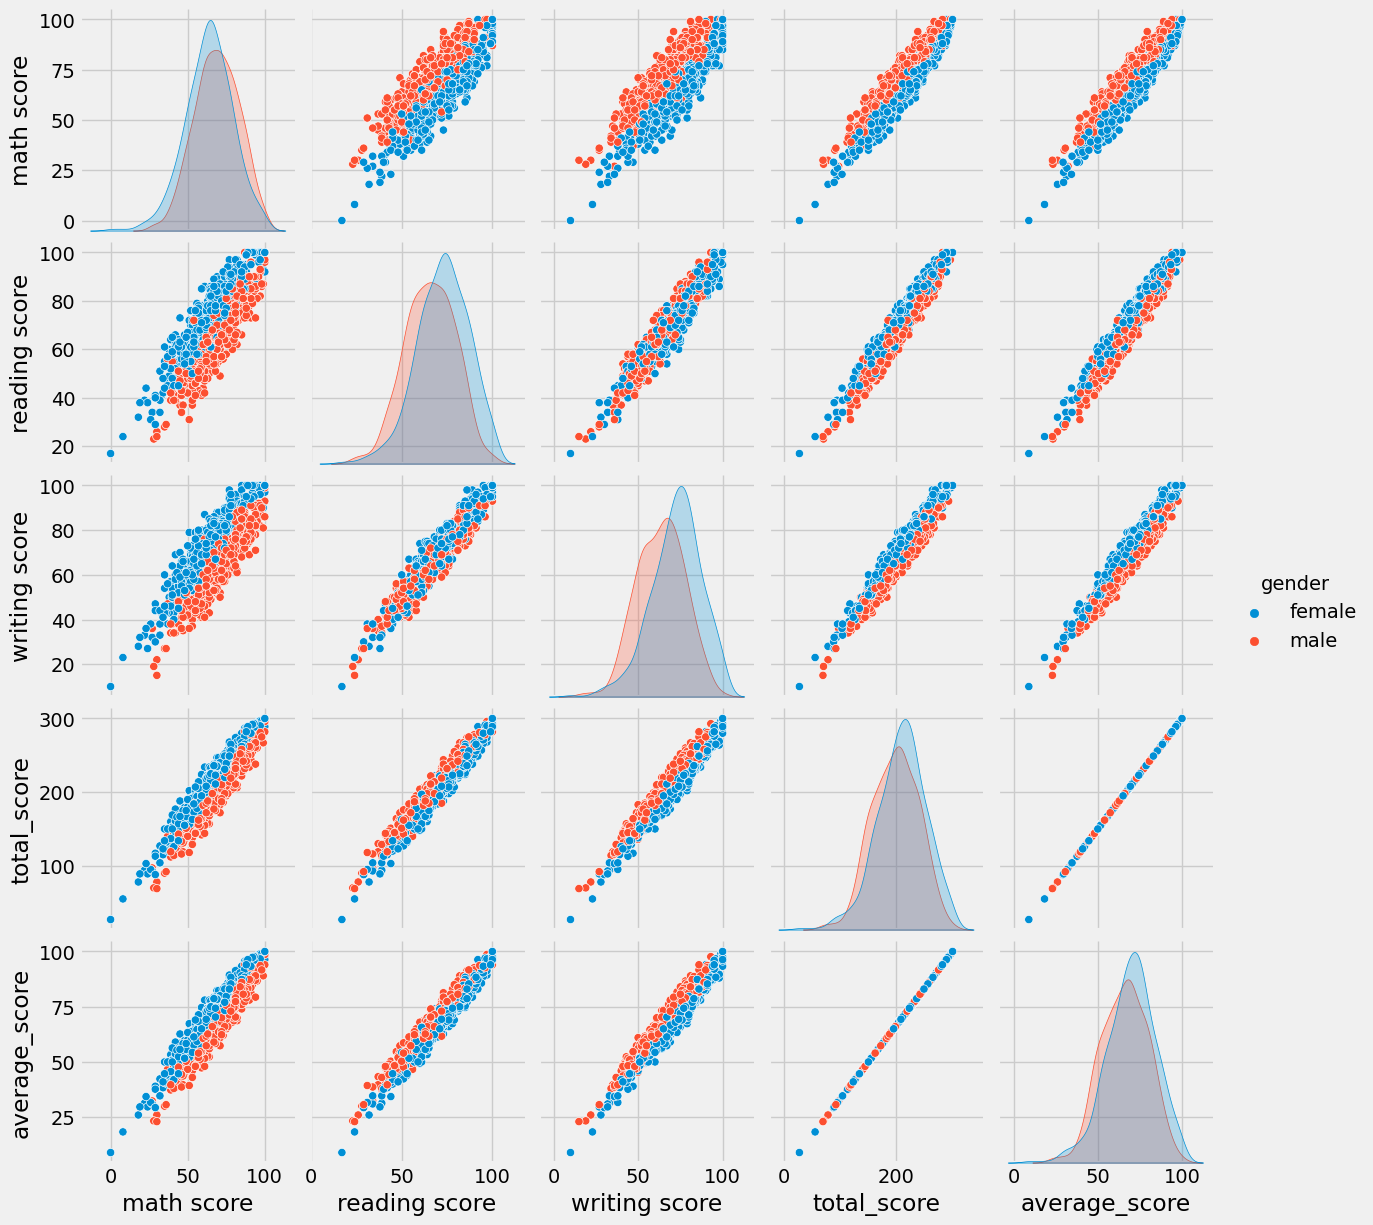

In [73]:
sns.pairplot(data,hue='gender')
plt.show()

From above, it is concluded that all the scores linearly increasing.

# Conclusions
1. Student's performance is related with lunch, race/ethinicity, parental level of education.
2. The percentage of females are high in comparision to the male students.
3. Student's performance is less affected by the test preparation course.